# Simulate UNO





In [1]:


import sys
sys.path.insert(0, "/home/paszin/Documents/card-game-simulation/caga-sim/GameSimulation/")


from Games.Uno import Game, Player

import json
import time

import random
random.seed(1419265)

import matplotlib.pyplot as plt


GAMESTATE
Discard Pile:	 |blue5| (height: 1)
Draw Pile: 	 71 cards
players: [1: |red4| |green3| |red0| |rainbow0| |blue3| |red9| |red5|, 2: |red4| |yellow2| |blue1| |green4| |green2| |yellow2| |green8|, 3: |red6| |blue9| |blue4| |yellow4| |rainbow0| |red1| |yellow9|, 4: |green7| |yellow6| |yellow8| |blue2| |blue8| |blue+2| |green1|]
Round 0
 1: |red4| |green3| |red0| |rainbow0| |blue3| |red9| |red5|
2: |red4| |yellow2| |blue1| |green4| |green2| |yellow2| |green8|
3: |red6| |blue9| |blue4| |yellow4| |rainbow0| |red1| |yellow9|
4: |green7| |yellow6| |yellow8| |blue2| |blue8| |blue+2| |green1|
 Discard Pile: |blue5| 
Player 1: play a card

Round 1
 1: |red4| |green3| |red0| |rainbow0| |red9| |red5|
2: |red4| |yellow2| |blue1| |green4| |green2| |yellow2| |green8|
3: |red6| |blue9| |blue4| |yellow4| |rainbow0| |red1| |yellow9|
4: |green7| |yellow6| |yellow8| |blue2| |blue8| |blue+2| |green1|
 Discard Pile: |blue3| 
Player 2: play a card

Round 2
 1: |red4| |green3| |red0| |rainbow0| |red9| 

Text(0.5, 1.0, 'Number of cards in the draw pile')

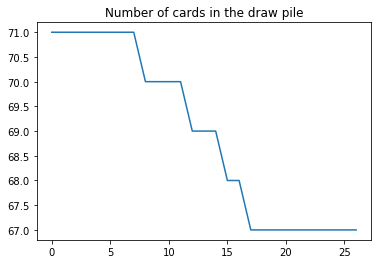

In [2]:
# run a simulation with 4 players and 7 cards each
# All players are similar, they are implemented in the class Player
game = Game(number_of_players=4, player_type=Player, cards_per_player=7)
# setup distributes the card
game.setup()

# log the current gamestate
game.gamestate.print_it_nice()

# run the simulation, quiet=False means that the progress will be logged to console
game.simulate(quiet=False)

# how does the draw pile develops?
draw_pile_evolution = [len(s.draw_pile) for s in game.gamestate_history]

plt.plot(draw_pile_evolution)
plt.title("Number of cards in the draw pile")



In [3]:
# number of iterations per game configuration
number_of_iterations = 1000

# simulate games with 2, 3, 4, 5, 7 and 10 players
number_of_players_configurations = [2, 3, 4, 5, 7, 10]

# simulate games with 3, 5, 7 and 9 cards per players
cards_per_player_configurations = [3, 5, 7, 9]

# same initial situation for all
random_seed = 1892

In [4]:
# Execute the simulation, this might take same time

start_time = time.time()

data = {} # number_of_players: {cards_per_player: [...], ..}


for number_of_players in number_of_players_configurations:
    turns_per_cards = {}
    for cards_per_player in cards_per_player_configurations:
        turns_per_cards[cards_per_player] = []
        random.seed(1892)
        for i in range(number_of_iterations):
            # if i % 1000 == 0: print(i)
            game = Game(number_of_players=number_of_players, player_type=Player, cards_per_player=cards_per_player)
            game.setup()
            game.simulate(quiet=True, turns=number_of_players*100)
            turns_per_cards[cards_per_player].append(game.turn/number_of_players)
    data[number_of_players] = turns_per_cards


end_time= time.time()

print(f"Simulations took {(end_time-start_time)//60}min {(end_time-start_time)%60}s")


Simulations took 29.0min 6.923285961151123s


In [5]:
with open("rounds_per_n_o_cards_per_n_o_player.json", "w") as outfile:
    json.dump(data, outfile)
